## Data investigation

Data import

Import libs

In [46]:
import sys
import os
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import pdb
from datetime import datetime

In [4]:
pwd()

'C:\\Users\\Ogi\\Datathon Sep 2018'

In [9]:
## Import the sample data
## clock the time for import

tic = time.time()

m1 = pd.read_csv("sample_Kaufland_case_IoT_and_predictive_maintenance.csv", \
                 sep = ';', encoding='utf-8')

tac = time.time()

diff = tac - tic

print("Time imprt had taken {a:.2f} seconds".format(a = diff))

Time imprt had taken 0.35 seconds


In [11]:
## Create a copy of the data
df_copy = df.copy()

In [12]:
## Describe data
df.shape

(18, 7)

In [13]:
## Look at the column names
df.columns

Index(['ifm_analysis_sensordata_for_datathon_final.machine_name',
       'ifm_analysis_sensordata_for_datathon_final.sensor_type',
       'ifm_analysis_sensordata_for_datathon_final.date_measurement',
       'ifm_analysis_sensordata_for_datathon_final.start_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.end_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.realvalue',
       'ifm_analysis_sensordata_for_datathon_final.unit'],
      dtype='object')

In [14]:
df.keys()

Index(['ifm_analysis_sensordata_for_datathon_final.machine_name',
       'ifm_analysis_sensordata_for_datathon_final.sensor_type',
       'ifm_analysis_sensordata_for_datathon_final.date_measurement',
       'ifm_analysis_sensordata_for_datathon_final.start_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.end_timestamp',
       'ifm_analysis_sensordata_for_datathon_final.realvalue',
       'ifm_analysis_sensordata_for_datathon_final.unit'],
      dtype='object')

In [15]:
df.describe()

,ifm_analysis_sensordata_for_datathon_final.realvalue
count,18.000000
mean,1.190944
std,0.372816
min,0.395000
25%,0.966250
50%,1.251500
75%,1.483750
max,1.620000


In [18]:
df.head(3)

,ifm_analysis_sensordata_for_datathon_final.machine_name,ifm_analysis_sensordata_for_datathon_final.sensor_type,ifm_analysis_sensordata_for_datathon_final.date_measurement,ifm_analysis_sensordata_for_datathon_final.start_timestamp,ifm_analysis_sensordata_for_datathon_final.end_timestamp,ifm_analysis_sensordata_for_datathon_final.realvalue,ifm_analysis_sensordata_for_datathon_final.unit
0,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823,0.395,mm/s
1,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653,0.577,mm/s
2,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467,0.717,mm/s


In [19]:
df.dtypes

ifm_analysis_sensordata_for_datathon_final.machine_name         object
ifm_analysis_sensordata_for_datathon_final.sensor_type          object
ifm_analysis_sensordata_for_datathon_final.date_measurement     object
ifm_analysis_sensordata_for_datathon_final.start_timestamp      object
ifm_analysis_sensordata_for_datathon_final.end_timestamp        object
ifm_analysis_sensordata_for_datathon_final.realvalue           float64
ifm_analysis_sensordata_for_datathon_final.unit                 object
dtype: object

In [21]:
# standardize the column names
def StandardizeNames(df):
    l = df.columns
    #pdb.set_trace()
    cols = [c.replace('ifm_analysis_sensordata_for_datathon_final.','').
              lower() for c in l]
    return cols

In [22]:
df.columns = StandardizeNames(df)

In [25]:
df.keys()

Index(['machine_name', 'sensor_type', 'date_measurement', 'start_timestamp',
       'end_timestamp', 'realvalue', 'unit', 'start_timestamp_f'],
      dtype='object')

In [29]:
## Convrt to datetime
df["date_measurement_f"] = pd.to_datetime(df["date_measurement"])

In [30]:
## Convrt to datetime
df["start_timestamp_f"] = pd.to_datetime(df["start_timestamp"])

In [31]:
## Convrt to datetime
df["end_timestamp_f"] = pd.to_datetime(df["end_timestamp"])

In [32]:
df.dtypes

machine_name                  object
sensor_type                   object
date_measurement              object
start_timestamp               object
end_timestamp                 object
realvalue                    float64
unit                          object
start_timestamp_f     datetime64[ns]
date_measurement_f    datetime64[ns]
end_timestamp_f       datetime64[ns]
dtype: object

In [33]:
df.head(3)

,machine_name,sensor_type,date_measurement,start_timestamp,end_timestamp,realvalue,unit,start_timestamp_f,date_measurement_f,end_timestamp_f
0,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823,0.395,mm/s,2016-09-02 15:26:42.823,2016-09-02,2016-09-02 15:26:42.823
1,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653,0.577,mm/s,2016-09-02 15:26:45.653,2016-09-02,2016-09-02 15:26:45.653
2,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467,0.717,mm/s,2016-09-02 15:26:48.467,2016-09-02,2016-09-02 15:26:48.467


## Plot the data in order to see some insights

C:\Users\Ogi\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


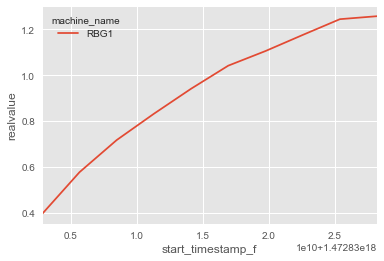

In [47]:
ax = sns.tsplot(data=df[0:10],time = "start_timestamp_f", unit = "machine_name", \
               condition = "machine_name", value = "realvalue")

C:\Users\Ogi\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


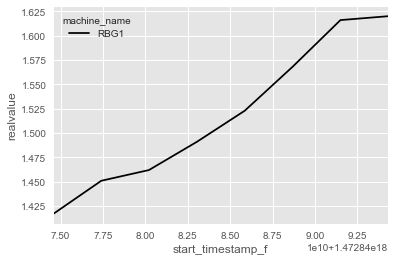

In [48]:
ax = sns.tsplot(data=df[10:],time = "start_timestamp_f", unit = "machine_name", \
               condition = "machine_name", value = "realvalue", color = "black")